Import packages

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # default figure size
plt.rcParams['font.size'] = 12           # default font size
plt.rcParams['font.family'] = 'Times New Roman'

Data preparation

In [66]:
df = pd.read_csv('../data/energydata_complete_cleaned.csv', parse_dates=['date'], index_col='date')
df.sort_index(inplace=True)
print('Data shape: ', df.shape)

# Define features and target variable
features = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 
            'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 
            'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 
            'Visibility', 'Tdewpoint', 'rv1',
            'is_weekend', 'hour_sin', 'hour_cos', 'day_of_week_sin', 
            'day_of_week_cos', 'Appliances_lag1', 'Appliances_rolling_mean_6']
target = 'Appliances'
print('Feature number: ', len(features))

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Data shape:  (19591, 38)
Feature number:  33
Training data shape:  (15672, 33)
Testing data shape:  (3919, 33)


In [67]:
model_results = {}

Linear Regression

Linear Regression Coefficients:  [ 8.66206647e-01 -9.97337388e+00 -4.96404128e+00  6.69029475e+00
  3.00312470e+00  5.31879335e+00  1.38510584e+00 -2.44704346e+00
 -3.96302759e-01  3.97175731e-01 -4.99926318e-02 -1.06373002e+00
 -7.03131439e-02  7.84292539e-01 -3.97654381e-01  1.60505516e+00
  8.88924250e-01 -6.68538190e-01  6.29654981e-01  1.02207261e+00
 -4.93466078e-02  2.19974862e-01  1.91042653e-01 -8.35362012e-03
 -6.00339208e-01 -8.84819982e-03 -5.05906587e+00 -1.28427289e+01
 -1.33194710e+01 -3.52802733e+00  6.69224383e-01  6.94754946e-01
  4.64557072e-02]
Linear Regreesion Mean Squared Error:  3604.6523223913828
Linear Regreesion Root Mean Squared Error:  60.038756835825495
Linear Regreesion Mean Absolute Error:  26.48586989094069
Linear Regreesion R^2 Score:  0.5326763281753775


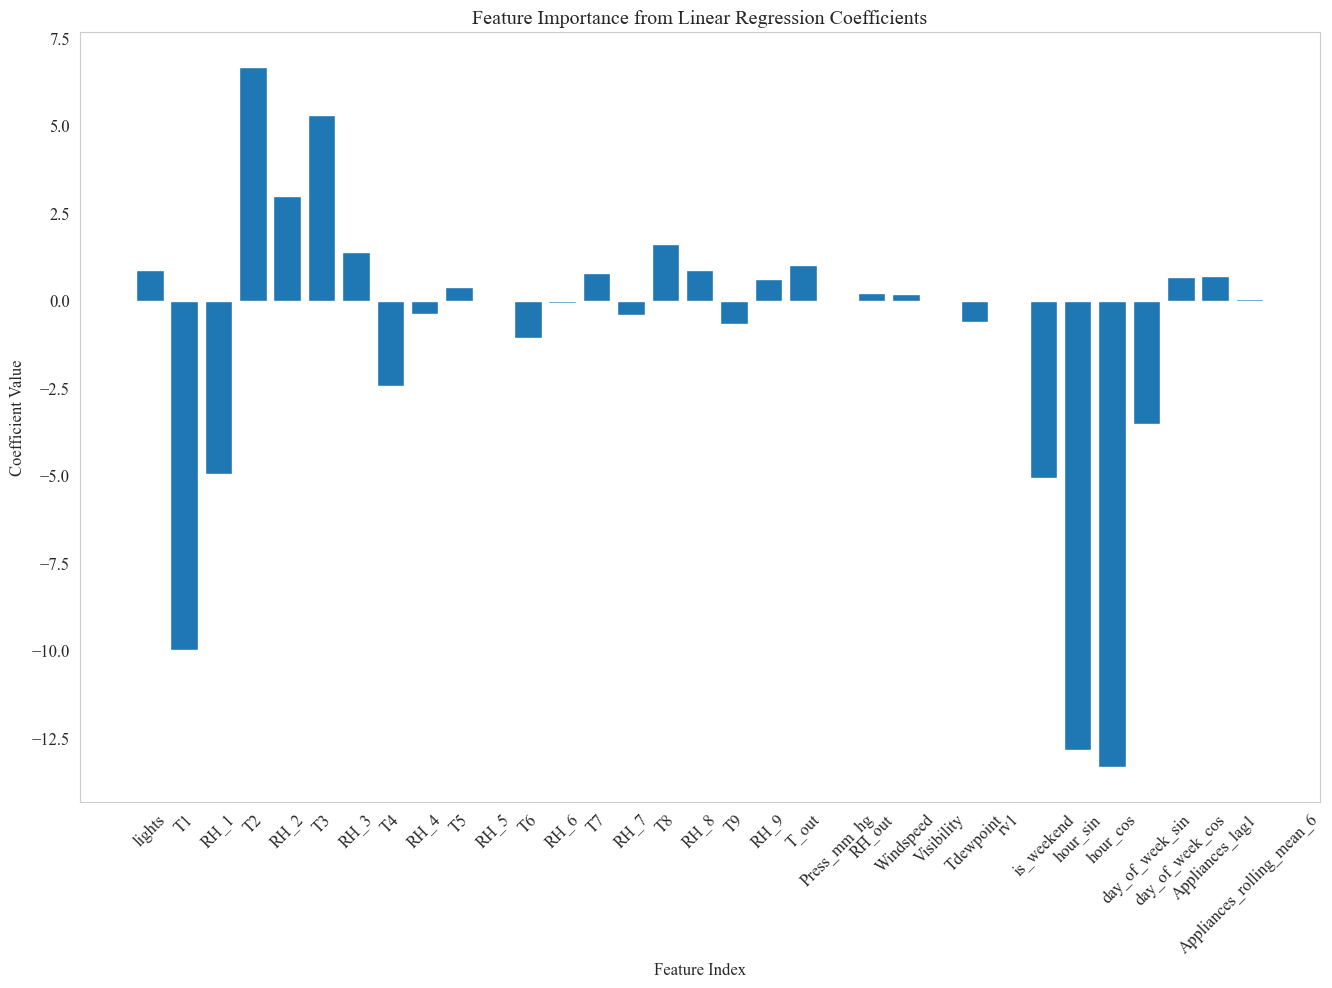

In [68]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
print("Linear Regression Coefficients: ", lin_reg.coef_)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regreesion Mean Squared Error: ", mse)
print("Linear Regreesion Root Mean Squared Error: ", rmse)
print("Linear Regreesion Mean Absolute Error: ", mae)
print("Linear Regreesion R^2 Score: ", r2)

# model_results['LR'] = {
#     'predictions': y_pred,
#     'MSE': mse,
#     'RMSE': rmse,
#     'MAE': mae,
#     'R2': r2
# }

# Feature coefficients analysis
importance = lin_reg.coef_
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance from Linear Regression Coefficients')
plt.grid()
plt.show()

Support vector regression

In [69]:
svr = SVR(kernel='rbf', C=10)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = root_mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR Mean Squared Error: ", mse_svr)
print("SVR Root Mean Squared Error: ", rmse_svr)
print("SVR Mean Absolute Error: ", mae_svr)
print("SVR R^2 Score: ", r2_svr)

model_results['SVR'] = {
    'predictions': y_pred_svr,
    'MSE': mse_svr,
    'RMSE': rmse_svr,
    'MAE': mae_svr,
    'R2': r2_svr
}

SVR Mean Squared Error:  3611.0467341660037
SVR Root Mean Squared Error:  60.09198560678457
SVR Mean Absolute Error:  23.984288072007338
SVR R^2 Score:  0.5318473272836377


Decision Tree

In [70]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = root_mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Mean Squared Error: ", mse_dt)
print("Decision Tree Root Mean Squared Error: ", rmse_dt)
print("Decision Tree Mean Absolute Error: ", mae_dt)
print("Decision Tree R^2 Score: ", r2_dt)

# model_results['DT'] = {
#     'predictions': y_pred_dt,
#     'MSE': mse_dt,
#     'RMSE': rmse_dt,
#     'MAE': mae_dt,
#     'R2': r2_dt
# }

Decision Tree Mean Squared Error:  26357.004337841285
Decision Tree Root Mean Squared Error:  162.34840417399022
Decision Tree Mean Absolute Error:  91.17376881857616
Decision Tree R^2 Score:  -2.417043016588639


Random forest regression

Random Forest Mean Squared Error:  4325.090742997182
Random Forest Root Mean Squared Error:  65.76542209244295
Random Forest Mean Absolute Error:  34.7068977639409
Random Forest R^2 Score:  0.43927538463647975


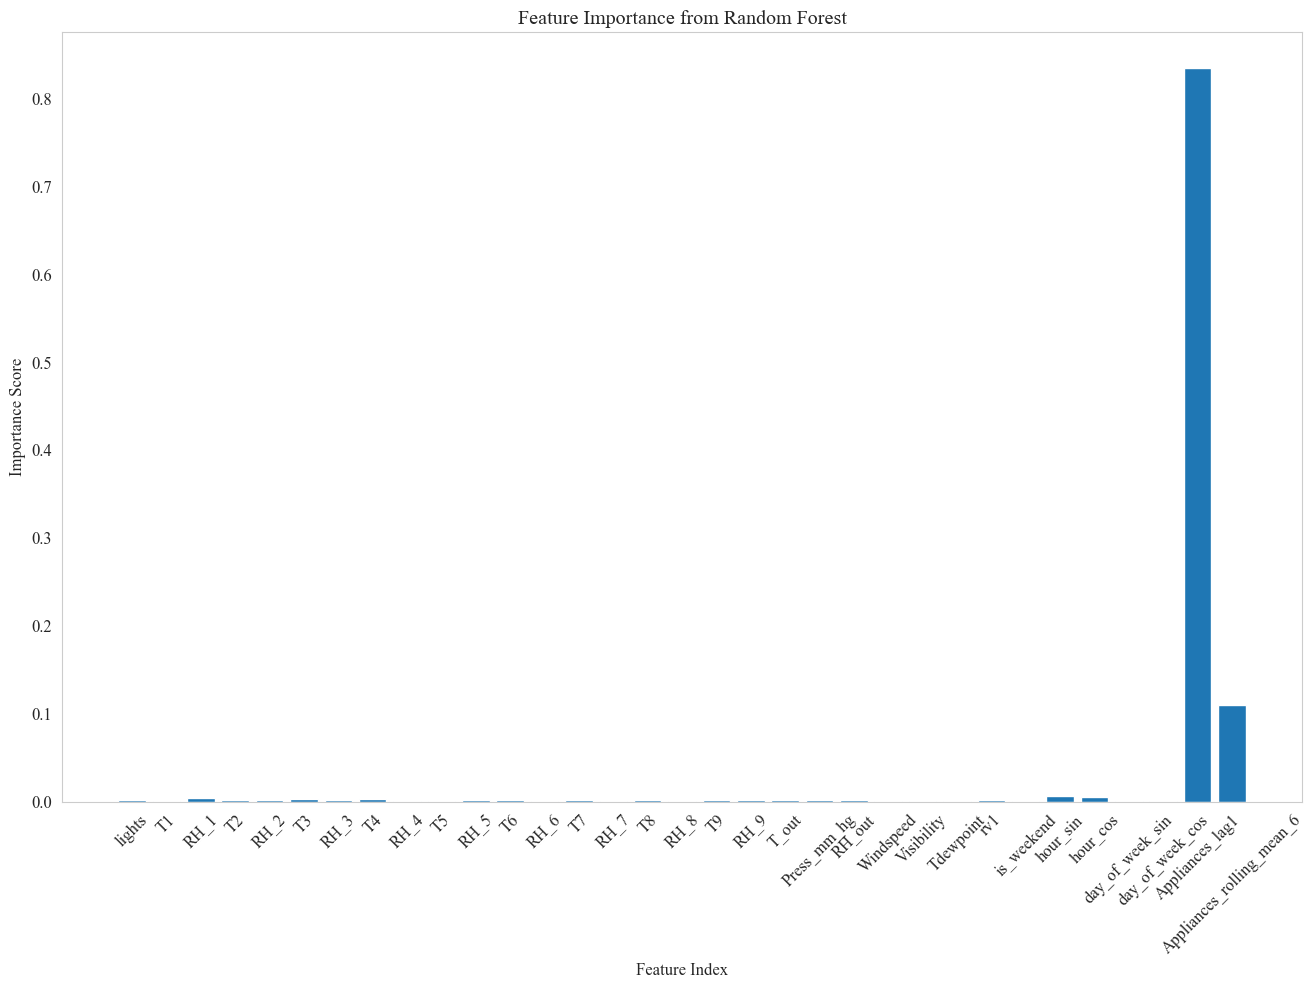

In [ ]:
rf_reg = RandomForestRegressor(
    n_estimators = 100, 
    random_state = 42,
    max_depth = 5,
    min_samples_split = 10,
    min_samples_leaf = 5,
    max_features = 0.8,
)

rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Mean Squared Error: ", mse_rf)
print("Random Forest Root Mean Squared Error: ", rmse_rf)
print("Random Forest Mean Absolute Error: ", mae_rf)
print("Random Forest R^2 Score: ", r2_rf)

model_results['RF'] = {
    'predictions': y_pred_rf,
    'MSE': mse_rf,
    "RMSE": rmse_rf,
    'MAE': mae_rf,
    'R2': r2_rf
}

# Feature importance from Random Forest
importances = rf_reg.feature_importances_
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(importances))], importances)
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.grid()
plt.show()

XGBoost

XGBoost Mean Squared Error:  3545.158935546875
XGBoost Root Mean Squared Error:  59.541236877441406
XGBoost Mean Absolute Error:  28.733631134033203
XGBoost R^2 Score:  0.5403892993927002


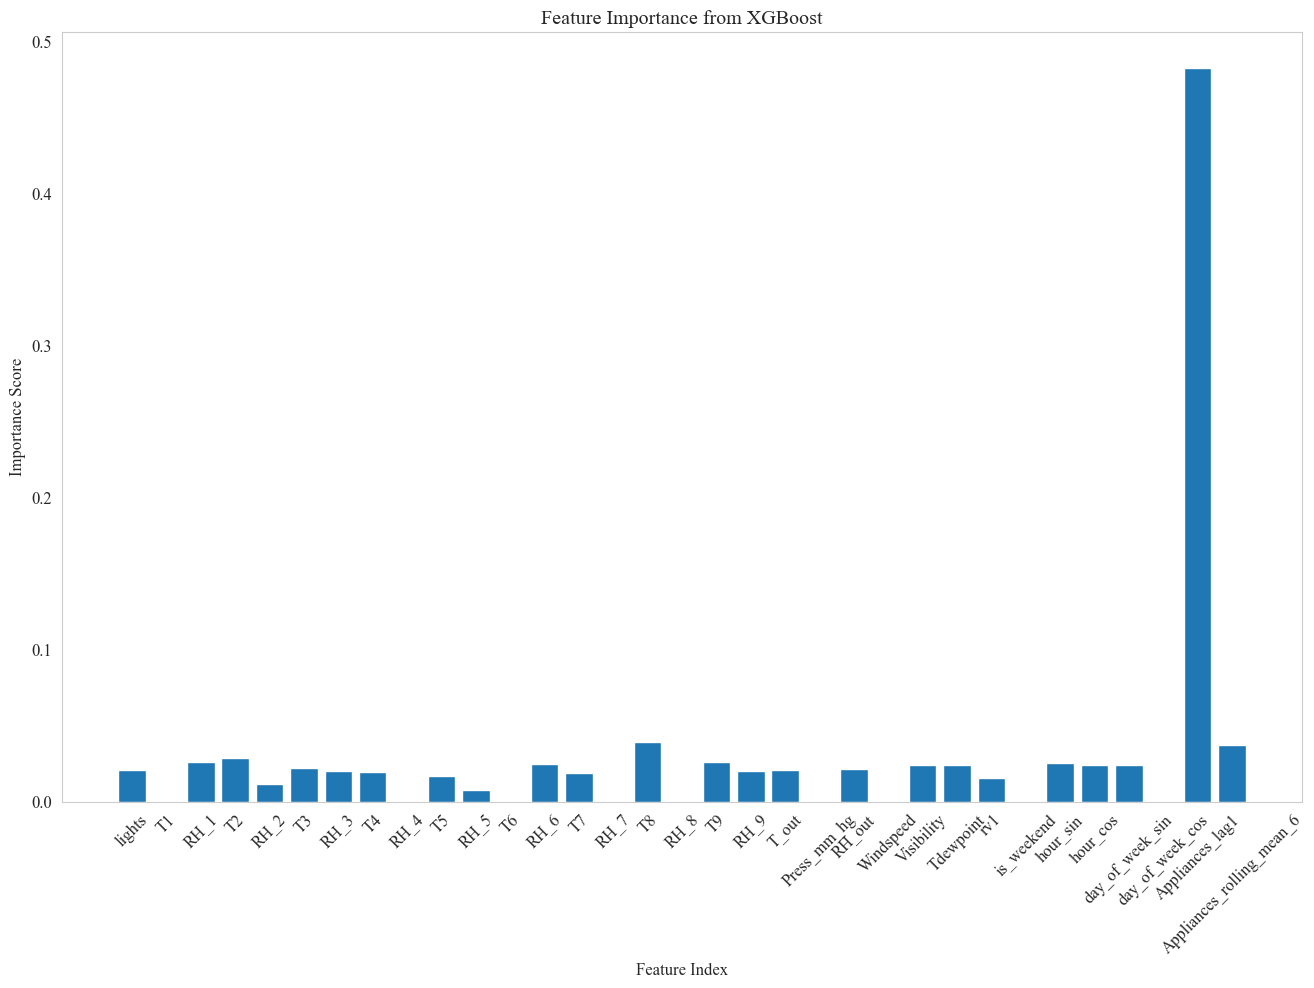

In [72]:
xgb_reg = xgb.XGBRegressor(
    n_estimators = 100,
    learning_rate = 0.03, 
    max_depth = 3, 
    random_state = 42
)

xgb_reg.fit(X_train, y_train)

y_pred_xgb = xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost Mean Squared Error: ", mse_xgb)
print("XGBoost Root Mean Squared Error: ", rmse_xgb)
print("XGBoost Mean Absolute Error: ", mae_xgb)
print("XGBoost R^2 Score: ", r2_xgb)

model_results['XGB'] = {
    'predictions': y_pred_xgb,
    'MSE': mse_xgb,
    'RMSE': rmse_xgb,
    'MAE': mae_xgb,
    'R2': r2_xgb
}

# Feature importance from XGBoost
xgb_importances = xgb_reg.feature_importances_
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(xgb_importances))], xgb_importances)
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importance from XGBoost')
plt.grid()
plt.show()

Multi-layer Perceptron

In [73]:
mlp_model = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    random_state=42,
    max_iter=100,
    early_stopping=True,
    learning_rate_init=0.001
)

mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = root_mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print("MLP Mean Squared Error: ", mse_mlp)
print("MLP Root Mean Squared Error: ", rmse_mlp)
print("MLP Mean Absolute Error: ", mae_mlp)
print("MLP R^2 Score: ", r2_mlp)

model_results['MLP'] = {
    'predictions': y_pred_mlp,
    'MSE': mse_mlp,
    'RMSE' : rmse_mlp,
    'MAE': mae_mlp,
    'R2': r2_mlp
}

MLP Mean Squared Error:  3564.2566112641225
MLP Root Mean Squared Error:  59.7013953879147
MLP Mean Absolute Error:  27.147301843387563
MLP R^2 Score:  0.5379134135754569


Results and visualisation

In [74]:
results_comparison = pd.DataFrame({
    model: {
        'MSE': metrics['MSE'],
        'RMSE': metrics['RMSE'],
        'MAE': metrics['MAE'],
        'R2': metrics['R2']
    }
    for model, metrics in model_results.items()
}).T.round(4)

print("Model Performance Metrics Comparison:")
print(results_comparison)

results_comparison.to_csv('../results/ablation_study/ML_metrics.csv')

Model Performance Metrics Comparison:
                     MSE     RMSE      MAE      R2
SVR            3611.0467  60.0920  23.9843  0.5318
Random Forest  4325.0907  65.7654  34.7069  0.4393
XGB            3545.1589  59.5412  28.7336  0.5404
MLP            3564.2566  59.7014  27.1473  0.5379


Energy Consumption Prediction Comparison Across Models

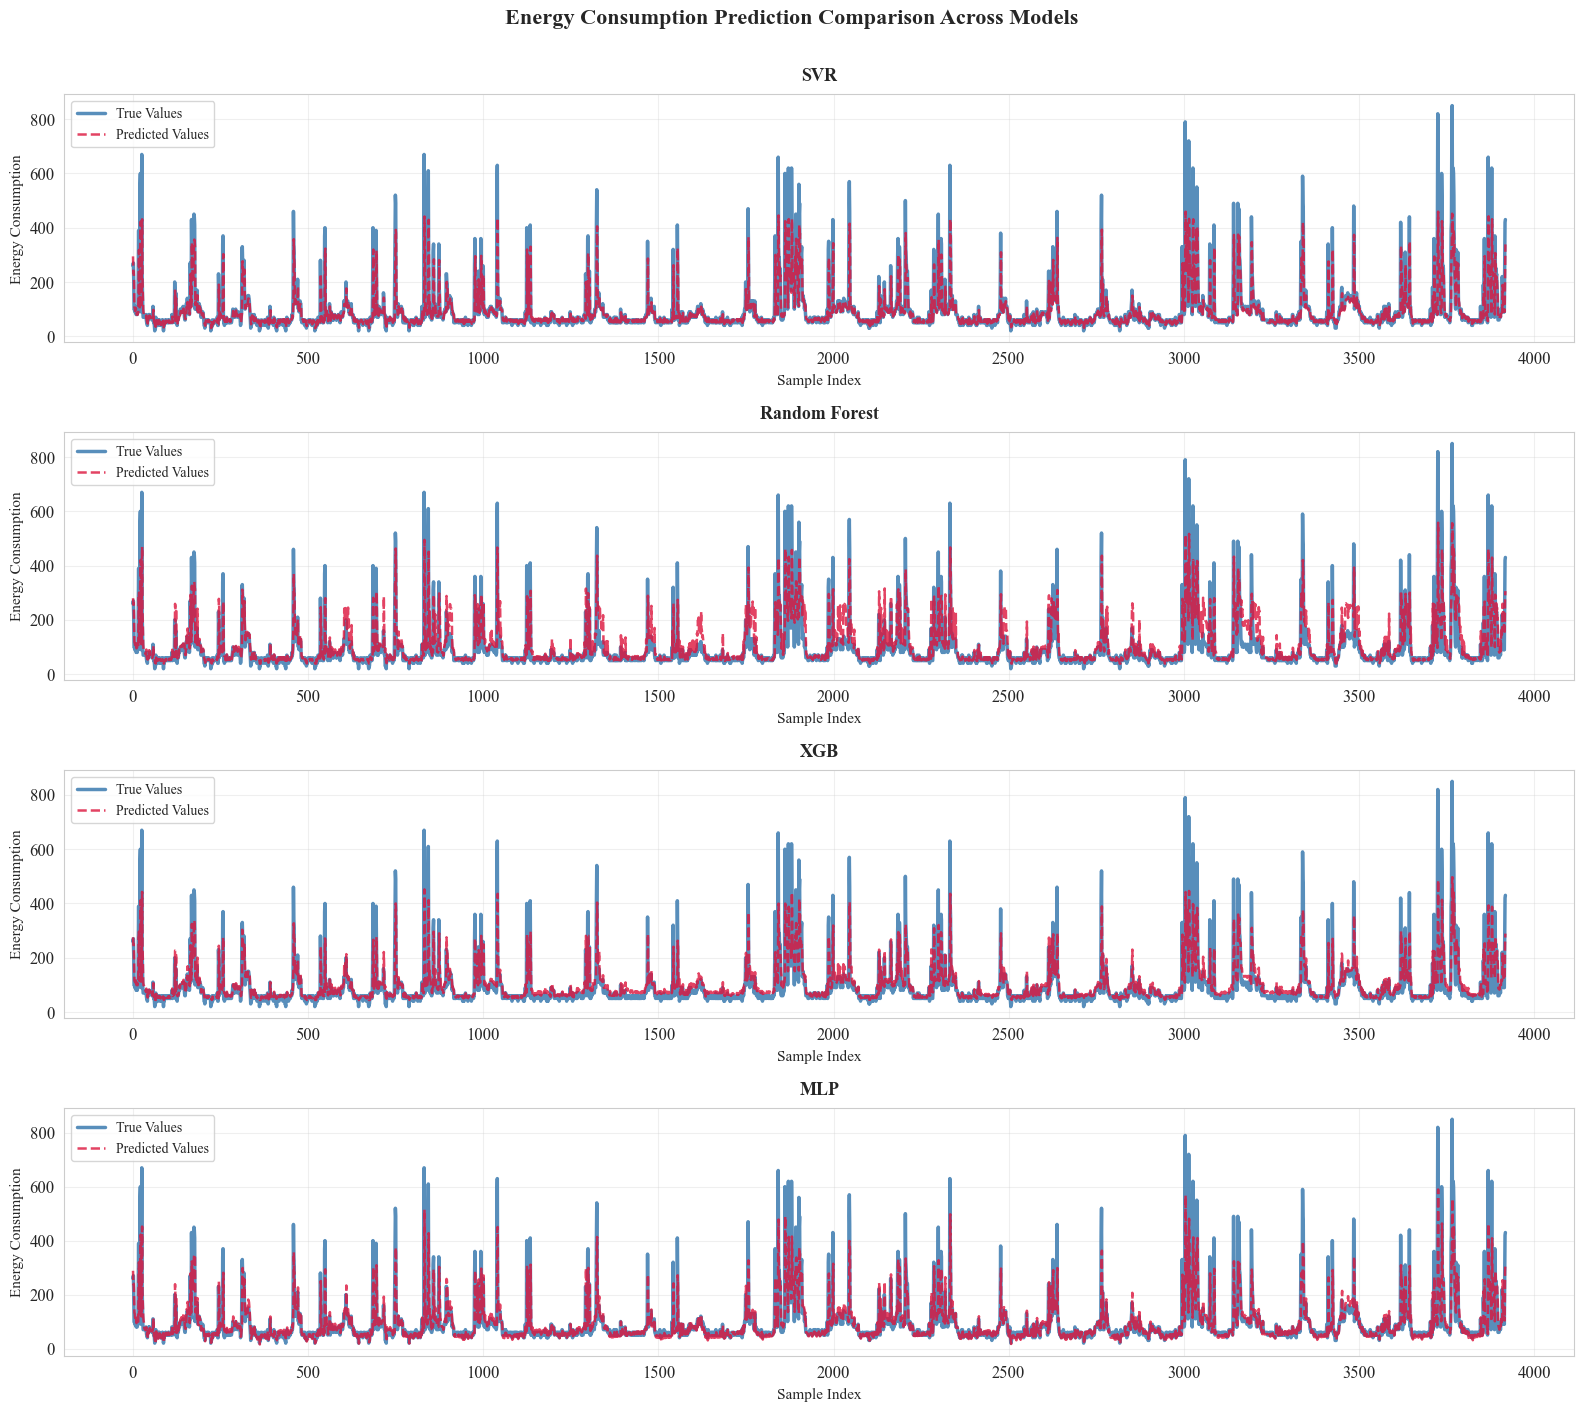

In [75]:
plt.figure(figsize=(16, 20))

for idx, (model_name, results) in enumerate(model_results.items(), 1):
    plt.subplot(6, 1, idx)

    y_pred = results['predictions']

    plt.plot(range(len(y_test)), y_test.values,
             'steelblue', linewidth=2.5, label='True Values', alpha=0.9)
    plt.plot(range(len(y_test)), y_pred,
             'crimson', linestyle='--', linewidth=1.8, label='Predicted Values', alpha=0.8)

    plt.title(f'{model_name}', fontsize=13, fontweight='bold', pad=10)
    plt.xlabel('Sample Index', fontsize=11)
    plt.ylabel('Energy Consumption', fontsize=11)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Energy Consumption Prediction Comparison Across Models', fontsize=16, fontweight='bold', y=1.02)
plt.savefig('../results/prediction_plots/ML_model_predictions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Model performance comparison

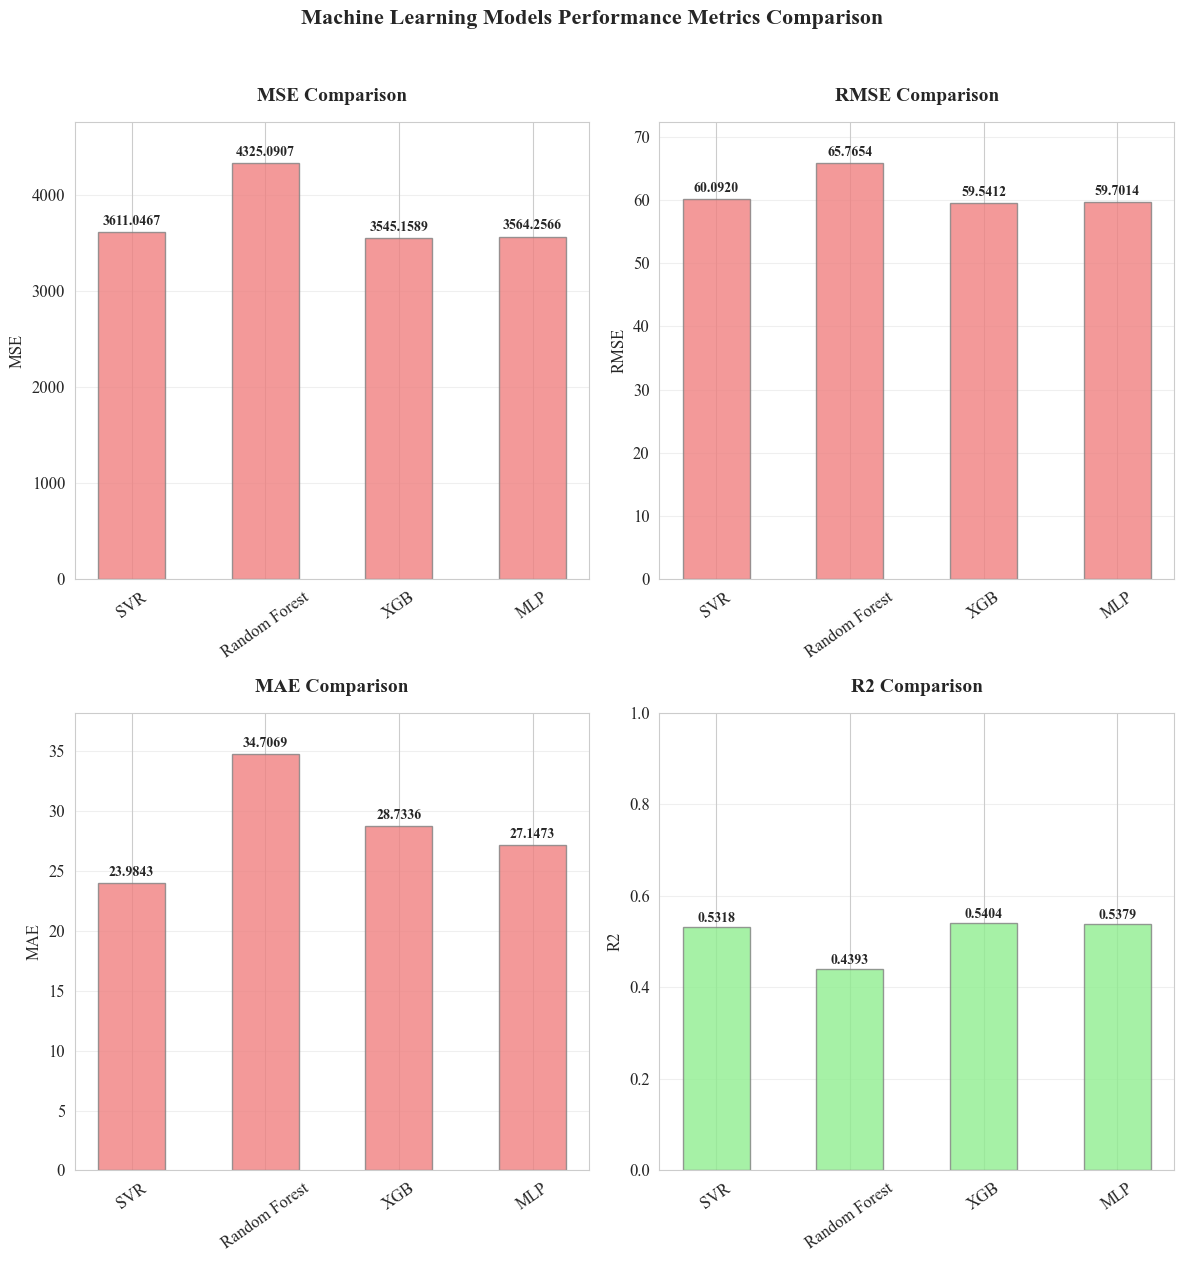

In [76]:
metric_names = ['MSE', 'RMSE', 'MAE', 'R2']
model_names = list(model_results.keys())

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, metric in enumerate(metric_names):
    row = i // 2
    col = i % 2

    metric_values = [model_results[model][metric] for model in model_names]

    bar_colors = ['lightcoral' if metric in ['MSE', 'RMSE', 'MAE'] else 'lightgreen' for _ in model_names]

    bars = axes[row, col].bar(model_names, metric_values, width=0.5, color=bar_colors, alpha=0.8, edgecolor='grey')
    axes[row, col].set_title(f'{metric} Comparison', fontsize=14, fontweight='bold', pad=15)
    axes[row, col].set_ylabel(metric, fontsize=12)
    axes[row, col].tick_params(axis='x', rotation=35)
    axes[row, col].grid(True, alpha=0.3, axis='y')
    if metric in ['MSE', 'RMSE', 'MAE']:
        axes[row, col].set_ylim(0, max(metric_values) * 1.1)
    elif metric == 'R2':
        axes[row, col].set_ylim(0, 1)

    for bar, value in zip(bars, metric_values):
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width() / 2., height + max(metric_values) * 0.01,
                             f'{value:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.suptitle('Machine Learning Models Performance Metrics Comparison', fontsize=16, fontweight='bold', y=1.05)
plt.savefig('../results/prediction_plots/ML_model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Predicted vs True Values Scatter Plot

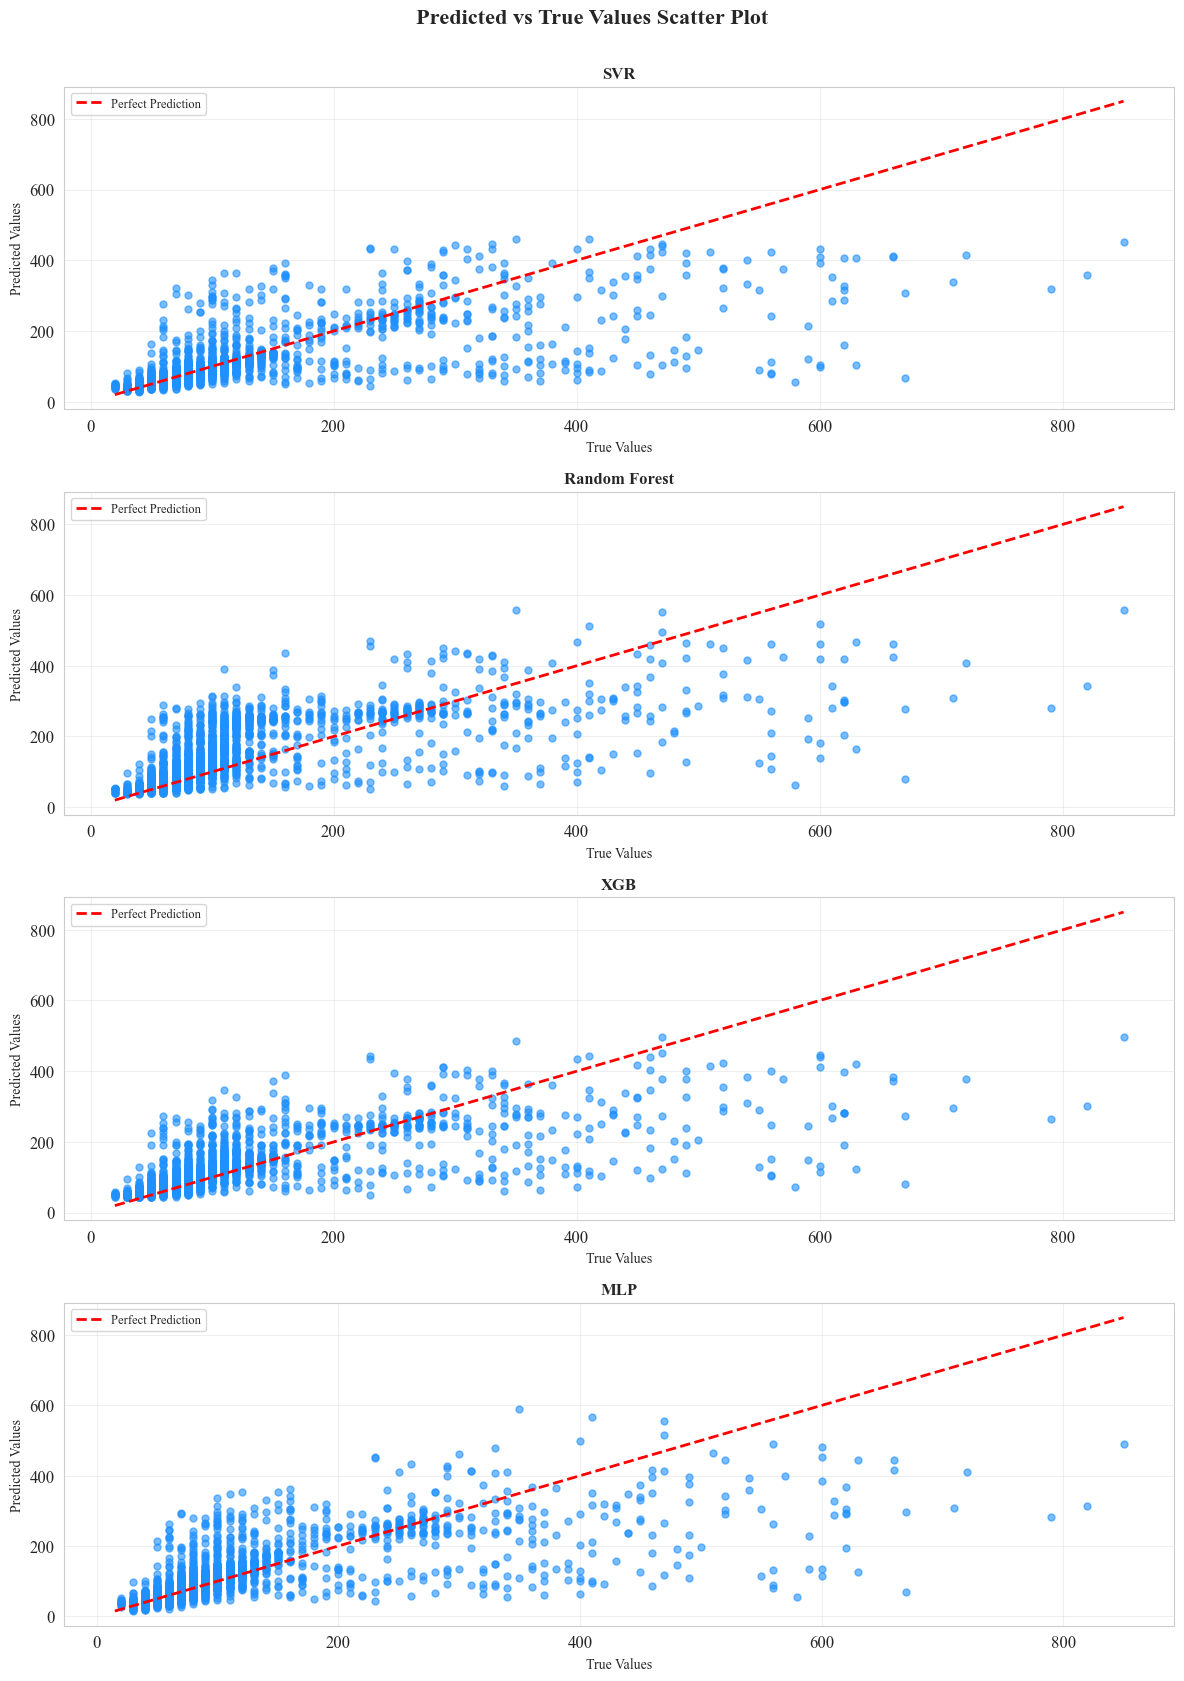

In [77]:
fig, axes = plt.subplots(5, 1, figsize=(12, 20))
axes = axes.ravel()

for idx, (model_name, results) in enumerate(model_results.items()):
    y_pred = results['predictions']

    axes[idx].scatter(y_test, y_pred, alpha=0.6, s=25, color='dodgerblue')

    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'red', linestyle='--',
                   linewidth=2, label='Perfect Prediction')

    axes[idx].set_title(f'{model_name}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('True Values', fontsize=10)
    axes[idx].set_ylabel('Predicted Values', fontsize=10)
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

for idx in range(len(model_results), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle('Predicted vs True Values Scatter Plot', fontsize=16, fontweight='bold', y=1.02)
plt.show()

Model performance ranking

In [78]:
r2_rankings = sorted(model_results.items(), key=lambda x: x[1]['R2'], reverse=True)
print("\nR² Score Ranking (Higher is Better):")
for rank, (model, metrics) in enumerate(r2_rankings, 1):
    print(f"  Rank {rank}: {model:25} R² = {metrics['R2']:.4f}")

mse_rankings = sorted(model_results.items(), key=lambda x: x[1]['MSE'])
print("\nMSE Ranking (Lower is Better):")
for rank, (model, metrics) in enumerate(mse_rankings, 1):
    print(f"  Rank {rank}: {model:25} MSE = {metrics['MSE']:.4f}")

rmse_rankings = sorted(model_results.items(), key=lambda x: x[1]['RMSE'])
print("\nRMSE Ranking (Lower is Better):")
for rank, (model, metrics) in enumerate(rmse_rankings, 1):
    print(f"  Rank {rank}: {model:25} RMSE = {metrics['RMSE']:.4f}")

mae_rankings = sorted(model_results.items(), key=lambda x: x[1]['MAE'])
print("\nMAE Ranking (Lower is Better):")
for rank, (model, metrics) in enumerate(mae_rankings, 1):
    print(f"  Rank {rank}: {model:25} MAE = {metrics['MAE']:.4f}")

best_r2_model = r2_rankings[0][0]
best_mse_model = mse_rankings[0][0]
best_rmse_model = rmse_rankings[0][0]
best_mae_model = mae_rankings[0][0]

print("\n" + "Best Model Summary " + "=" * 40)
print(f"  Best R² Model:  {best_r2_model} (R² = {model_results[best_r2_model]['R2']:.4f})")
print(f"  Best MSE Model: {best_mse_model} (MSE = {model_results[best_mse_model]['MSE']:.4f})")
print(f"  Best RMSE Model: {best_rmse_model} (RMSE = {model_results[best_rmse_model]['RMSE']:.4f})")
print(f"  Best MAE Model: {best_mae_model} (MAE = {model_results[best_mae_model]['MAE']:.4f})")

top_models = {best_r2_model, best_mse_model, best_mae_model}
if len(top_models) == 1:
    overall_best = list(top_models)[0]
    print(f"\nOverall Best Model: {overall_best}")
    print(f"  This model performs best on all three metrics!")
else:
    print(f"\nDifferent models excel in different metrics:")
    print(f"  - For prediction accuracy → Choose {best_r2_model} (Highest R²)")
    print(f"  - For error control → Choose {best_mse_model} (Lowest MSE)")


R² Score Ranking (Higher is Better):
  Rank 1: XGB                       R² = 0.5404
  Rank 2: MLP                       R² = 0.5379
  Rank 3: SVR                       R² = 0.5318
  Rank 4: Random Forest             R² = 0.4393

MSE Ranking (Lower is Better):
  Rank 1: XGB                       MSE = 3545.1589
  Rank 2: MLP                       MSE = 3564.2566
  Rank 3: SVR                       MSE = 3611.0467
  Rank 4: Random Forest             MSE = 4325.0907

RMSE Ranking (Lower is Better):
  Rank 1: XGB                       RMSE = 59.5412
  Rank 2: MLP                       RMSE = 59.7014
  Rank 3: SVR                       RMSE = 60.0920
  Rank 4: Random Forest             RMSE = 65.7654

MAE Ranking (Lower is Better):
  Rank 1: SVR                       MAE = 23.9843
  Rank 2: MLP                       MAE = 27.1473
  Rank 3: XGB                       MAE = 28.7336
  Rank 4: Random Forest             MAE = 34.7069

Best Model Summary ========================================


Write prediction results into a csv file

In [79]:
results_df = pd.DataFrame({
    'true': y_test,
    'SVR_prediction': model_results['Support Vector Regression']['predictions'],
    'RF_prediction': model_results['Random Forest']['predictions'],
    'XGB_prediction': model_results['XGBoost']['predictions'],
    'MLP_prediction': model_results['Multi-layer Perceptron']['predictions']
})
results_df.to_csv("../results/ML_predictions.csv", index=False)

KeyError: 'Support Vector Regression'